In [ ]:
!pip install scanpy
import numpy as np
import pandas as pd
import scanpy as sc
import torch
import torch.nn as nn
torch.cuda.is_available()

     |████████████████████████████████| 2.0 MB 5.4 MB/s 
     |████████████████████████████████| 86 kB 744 kB/s 
     |████████████████████████████████| 91 kB 8.0 MB/s 
     |████████████████████████████████| 1.1 MB 26.3 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=4e86db83b76e4083952fc62a8152273f03b0bacc7abed05e4c2fc1c6ce8667e8
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=8dea0ca84356c66324b37ea268757143f9592004e955e159b40ef8e010275dd9
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=333ee5ada634e8c004454487c4e9c0975bbc49d14716276a5c8eac8f366fcfbb
  Stored in directory: /root/.cache/pi

True

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
#make a shortcut to emily's shared drive folder in your drive so you can access the data at
import os
os.listdir('/content/drive/My Drive/methyl_impute')

Mounted at /content/drive


['Peek_data.ipynb',
 'tf_multiclass_prediction.ipynb',
 'classifier_results.gslides',
 'Project Proposal Brainstorming.gdoc',
 'VAE_impute (vanilla).ipynb',
 'VAE_impute (variational).ipynb',
 'VAE_impute (vanilla) (custom dropout).ipynb',
 'adult_cortex_CG-CH_OLDCOPY.h5ad',
 'adult_cortex_CG_CH.h5ad',
 'cg_counts.parq',
 'cg_covs.parq',
 'PredictionModel.ipynb']

In [ ]:
#struture of data type
#https://anndata.readthedocs.io/en/latest/
adata=sc.read_h5ad('/content/drive/My Drive/methyl_impute/adult_cortex_CG_CH.h5ad')
adata

AnnData object with n_obs × n_vars = 11945 × 44772
    obs: 'sample', 'L1', 'L2', 'L3', 'true_batch', 'age', 'age_groups', 'leiden'
    var: 'batch'
    uns: 'L2_colors', 'L3_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
len(adata.obs['L3'].unique())

27

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()

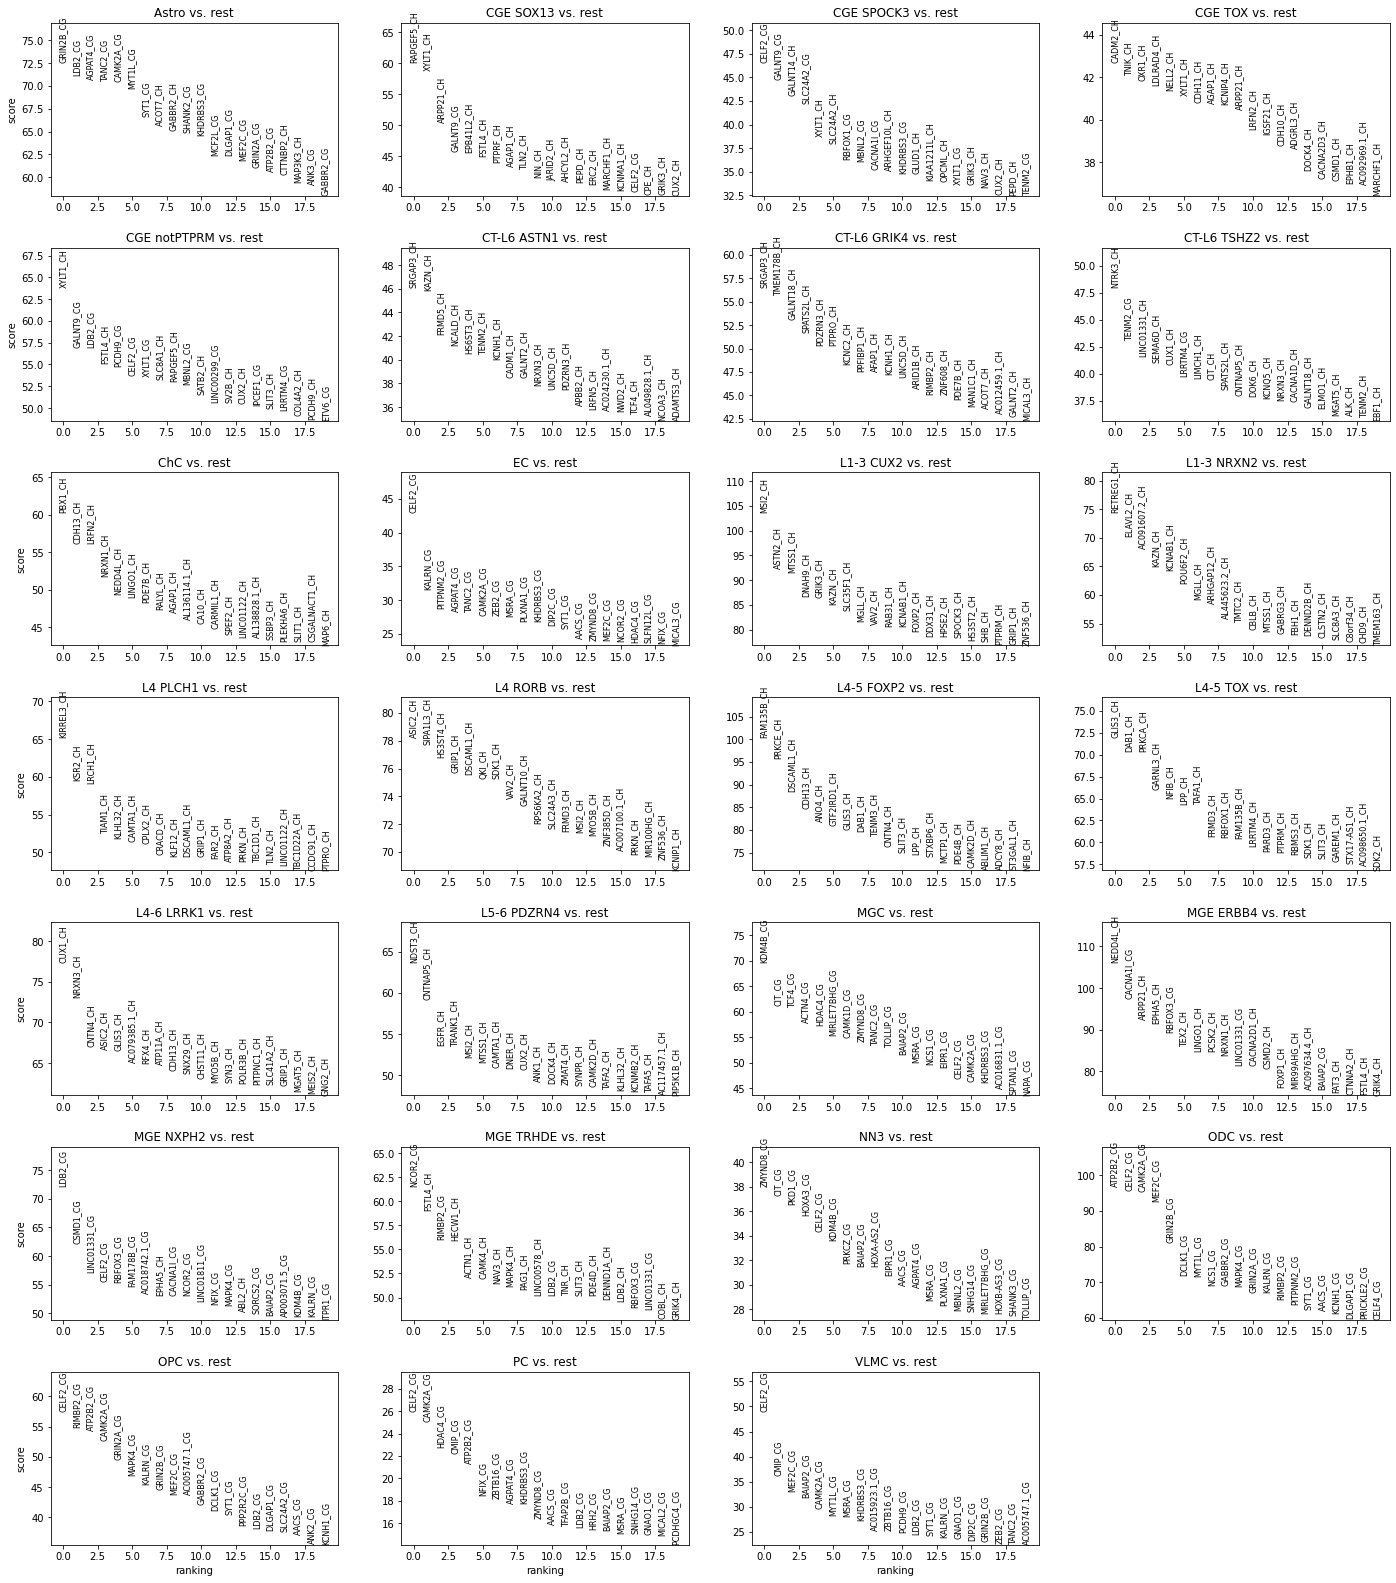

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


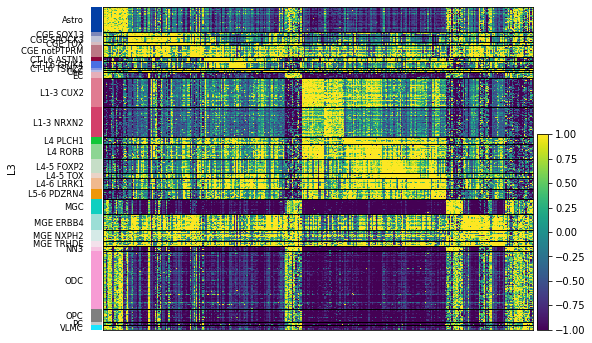

In [ ]:
#collect top marker genes

sc.tl.rank_genes_groups(adata, 'L3',n_genes=20)
sc.pl.rank_genes_groups(adata, sharey=False)
markers=[]
for i in range(27):
    for j in range(20):
        if adata.uns['rank_genes_groups']['names'][j][i] not in markers:
            markers.append(adata.uns['rank_genes_groups']['names'][j][i])
adata2=adata[:,markers]
sc.pp.scale(adata2)
sc.pl.heatmap(adata2, markers, groupby='L3',vmax=1,vmin=-1)

In [ ]:
len(adata.uns['rank_genes_groups']['names'][0])


27

In [ ]:
adata

AnnData object with n_obs × n_vars = 11945 × 38774
    obs: 'Total reads', 'Mapped reads', 'Nonclonal reads', 'Filtered reads', 'Filtered rate', 'mCCC/CCC', 'mCG/CG', 'mCH/CH', 'Estimated mCG/CG', 'Estimated mCH/CH', '% Genome covered', 'IntraChrInt>1kb', 'InterChrInt', 'TotalInt', 'IntraChrInt>10kb', 'true_batch', 'batch', 'Mapping rate-0-0', '% Nonclonal rate-0-0', 'Lambda mC/C-0-0', 'Mapping rate-1-0', '% Nonclonal rate-1-0', 'Lambda mC/C-1-0', 'leiden-0', 'anno-0', 'age-0', 'log2_age', 'temp_clust-0', 'adult_anno-0', 'Neuron-0', 'L1', 'deep_anno-0', 'dev_anno-0', 'deepest_anno-0', 'Mapping rate-1', '% Nonclonal rate-1', 'Lambda mC/C-1', 'Mapping rate-2', '% Nonclonal rate-2', 'Lambda mC/C-2', 'leiden', 'final_anno', 'temp_clust', 'L2', 'TLE4_mCH', 'graph_groups', 'L3', 'age_groups'
    var: 'mean_X', 'mean_coverage', 'batch'
    uns: 'L1-0_colors', 'L1_colors', 'L2_colors', 'L3_colors', 'deepest_anno-0_colors', 'dendrogram_true_batch', 'graph_groups_colors', 'leiden', 'leiden_color

In [ ]:
adata2.shape

(11945, 342)

In [ ]:
#comment out this block to keep all genes
adata=adata[:,markers]
adata

View of AnnData object with n_obs × n_vars = 11945 × 342
    obs: 'Total reads', 'Mapped reads', 'Nonclonal reads', 'Filtered reads', 'Filtered rate', 'mCCC/CCC', 'mCG/CG', 'mCH/CH', 'Estimated mCG/CG', 'Estimated mCH/CH', '% Genome covered', 'IntraChrInt>1kb', 'InterChrInt', 'TotalInt', 'IntraChrInt>10kb', 'true_batch', 'batch', 'Mapping rate-0-0', '% Nonclonal rate-0-0', 'Lambda mC/C-0-0', 'Mapping rate-1-0', '% Nonclonal rate-1-0', 'Lambda mC/C-1-0', 'leiden-0', 'anno-0', 'age-0', 'log2_age', 'temp_clust-0', 'adult_anno-0', 'Neuron-0', 'L1', 'deep_anno-0', 'dev_anno-0', 'deepest_anno-0', 'Mapping rate-1', '% Nonclonal rate-1', 'Lambda mC/C-1', 'Mapping rate-2', '% Nonclonal rate-2', 'Lambda mC/C-2', 'leiden', 'final_anno', 'temp_clust', 'L2', 'TLE4_mCH', 'graph_groups', 'L3', 'age_groups'
    var: 'mean_X', 'mean_coverage', 'batch'
    uns: 'L1-0_colors', 'L3_colors', 'deepest_anno-0_colors', 'dendrogram_true_batch', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'rank_genes

In [ ]:
#data matrix, X
X=np.array(adata.X)
print(X.shape)
#cell type labels, y
yl=adata.obs['L3']
print(yl.shape)

(11945, 342)
(11945,)


In [ ]:
yl

20210111-1863-preAb-PFC-B12_A3              Astro
20210111-1863-preAb-PFC-B12_A23               OPC
20210111-1863-preAb-PFC-B12_B10        L4-5 FOXP2
20210111-1863-preAb-PFC-B12_A1          L1-3 CUX2
20210111-1863-preAb-PFC-B12_B13        L4-5 FOXP2
                                         ...     
20210528-UMB5621-preAb-PFC-B2_O22       L1-3 CUX2
20210528-UMB5621-preAb-PFC-B2_P3        L1-3 CUX2
20210528-UMB5621-preAb-PFC-B2_P13        L4-5 TOX
20210528-UMB5621-preAb-PFC-B2_P14    CGE notPTPRM
20210528-UMB5621-preAb-PFC-B2_P19       L1-3 CUX2
Name: L3, Length: 11945, dtype: category
Categories (27, object): ['Astro', 'CGE SOX13', 'CGE SPOCK3', 'CGE TOX', ..., 'ODC', 'OPC', 'PC',
                          'VLMC']

In [ ]:
#gotta convert class labels to ints to one hot encode
uniq=yl.unique()
int_map={uniq[i]:i for i in range(len(uniq))}
int_y=yl.apply(lambda i: int_map[i])

int_y

20210111-1863-preAb-PFC-B12_A3        0
20210111-1863-preAb-PFC-B12_A23       1
20210111-1863-preAb-PFC-B12_B10       2
20210111-1863-preAb-PFC-B12_A1        3
20210111-1863-preAb-PFC-B12_B13       2
                                     ..
20210528-UMB5621-preAb-PFC-B2_O22     3
20210528-UMB5621-preAb-PFC-B2_P3      3
20210528-UMB5621-preAb-PFC-B2_P13    22
20210528-UMB5621-preAb-PFC-B2_P14     8
20210528-UMB5621-preAb-PFC-B2_P19     3
Name: L3, Length: 11945, dtype: category
Categories (27, int64): [0, 13, 25, 21, ..., 5, 1, 19, 15]

In [ ]:
#to tensor and OHE

int_y=torch.tensor(int_y)
#ohe_y=torch.nn.functional.one_hot(int_y)
int_y

tensor([ 0,  1,  2,  ..., 22,  8,  3])

In [ ]:
from torch.utils.data import Dataset
class MethylDataset(Dataset):
  def __init__(self,matrix,labels):
    self.labels=labels
    self.matrix=matrix

  def __len__(self):
    return len(self.labels)

  def __getitem__(self,idx):
    cell_X=self.matrix[idx]
    cell_label=self.labels[idx]
    return cell_X, cell_label

In [ ]:
from torch.utils.data import DataLoader
methyl_dataset=MethylDataset(X,int_y)

In [ ]:
print(len(methyl_dataset[0]))
print(len(methyl_dataset[0][0]))
#print(len(methyl_dataset[0][1]))

2
342


In [ ]:
methyl_dataset[13]

(array([0.8979592 , 0.96629214, 0.75      , 0.8292683 , 0.42307693,
        0.84810126, 0.76811594, 0.02930403, 0.01539   , 0.8922306 ,
        0.7380952 , 0.7109827 , 0.8363636 , 0.18518518, 0.5478261 ,
        0.90697676, 0.02005013, 0.01176471, 0.78571427, 0.76521736,
        0.02504817, 0.05205599, 0.1271777 , 0.9206349 , 0.03125   ,
        0.13308458, 0.01737452, 0.04588567, 0.04718278, 0.01476015,
        0.04059609, 0.07222223, 0.08049536, 0.05969458, 0.08588499,
        0.04056912, 0.73429954, 0.10606061, 0.03328982, 0.02556539,
        0.07653529, 0.7878788 , 0.02093398, 0.80458015, 0.8292683 ,
        0.9009009 , 0.0486692 , 0.02730375, 0.01214575, 0.02677405,
        0.9322034 , 0.07872697, 0.82051283, 0.03398927, 0.02441731,
        0.01978973, 0.06120136, 0.02555366, 0.07713126, 0.05999077,
        0.08127949, 0.11703432, 0.03024575, 0.02185055, 0.05681818,
        0.01858656, 0.0845288 , 0.08957332, 0.0728863 , 0.81954885,
        0.03648208, 0.10726073, 0.93670887, 0.06

In [ ]:
#base for train test split 
train_size = int(0.8 * len(methyl_dataset))
test_size = len(methyl_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(methyl_dataset, [train_size, test_size])

In [ ]:
batch_size=512
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_dataset, batch_size=int(batch_size/2))

In [ ]:
#this should output 1, 38774
#im getting an entire batch per item?
examples = enumerate(test_dl)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([256, 342])

In [ ]:
example_data

tensor([[0.7692, 0.7917, 0.7792,  ..., 0.5692, 0.3542, 0.8125],
        [0.8741, 0.7188, 0.8983,  ..., 0.8485, 0.4510, 0.9412],
        [0.4105, 0.3856, 0.5263,  ..., 0.4297, 0.1944, 0.3571],
        ...,
        [0.8057, 0.8803, 0.6947,  ..., 0.8267, 0.4026, 0.9065],
        [0.5814, 0.5949, 0.7417,  ..., 0.7500, 0.5455, 0.8615],
        [0.8396, 0.9098, 0.7368,  ..., 0.8710, 0.4118, 0.8182]])

In [ ]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)

cuda:0


In [ ]:
class Methyl_Predict_Model(nn.Module):
  def __init__(self):
    super().__init__()
    #currently using 38774 genes
    self.fc1=nn.Linear(in_features=342,out_features=256,bias=True)
    self.activation1=nn.ReLU()
    self.fc2=nn.Linear(in_features=256,out_features=128,bias=True)
    self.activation2=nn.ReLU()
    self.fc3=nn.Linear(in_features=128,out_features=27,bias=True)
    self.activation3=nn.ReLU()
  def forward(self,x):
    #x = x.view(x.size(0), -1)
    x=self.activation1(self.fc1(x))
    x=self.activation2(self.fc2(x))
    x=self.activation3(self.fc3(x))
    return x

In [ ]:
def test(model, test_dl):
  """ TODO: Compute accuracy """
  accuracy = 0
  total=0
  for (X, y) in test_dl:
    X=X.cuda()
    y=y.cuda()
    output=model(X)
    _,predictions=output.max(1)
    print(y)
    print(predictions)
    #if output.index(max(output))==y:
    #  accuracy+=1
    accuracy+=(predictions == y).sum()
    total+=predictions.size(0)
  
  accuracy=accuracy/total

  return accuracy

In [ ]:
def train(model, lr, momentum, num_epochs, train_dl, test_dl,display_epoch_n=10):
  """ TODO: Define your optimizer """
  opt = torch.optim.SGD(model.parameters(),lr=lr,momentum=momentum)
  loss=torch.nn.CrossEntropyLoss()
  for epoch in range(1, num_epochs + 1):
    """ TODO: Do training on the training set"""
    for X, y in train_dl:
      X=X.cuda()
      y=y.cuda()
      #X=X.reshape(-1,28*28)
      prediction=model(X)
      opt.zero_grad()
      #print(y)
      loss(prediction,y).backward()
      opt.step()

    test_accuracy = test(model, test_dl)
    if epoch%display_epoch_n==0:
      print(f"Test accuracy at epoch {epoch}: {test_accuracy:.4f}")

In [ ]:
#this was actually training at one point
# idk whats happening now. Either pytorch or google collab is fucky

#I am also willing to accept that I have fucked up the code somewhere

#welp theres the problem. I am predicting the same thing each time :(

num_epochs=20
momentum=.1
lr=.0001


model = Methyl_Predict_Model()
model =model.cuda()
train(model, lr, momentum, num_epochs, train_dl, test_dl,1)
test_accuracy = test(model, test_dl)
print(f"Final test accuracy: {test_accuracy:.4f}")

Streaming output truncated to the last 5000 lines.
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([ 6,  5,  2, 18,  4, 25,  7,  2, 16, 18,  0, 19,  9,  0,  6,  1,  0,  0,
        16,  9,  5,  0,  9,  0, 12,  5, 18, 13,  3,  1,  9, 10,  4,  5, 11,  5,
        11, 18,  3,  5,  3, 22,  1,  3, 13,  0,  1,  5,  9,  6,  0,  6,  7,  1,
         8,  3, 12,  3,  1, 20,  5,  3, 15,  3, 18,  7,  5, 18, 25, 11, 20,  3,
        24, 25, 16,  3, 24, 11,  4,  2,  2, 12,  6, 17, 22, 20, 12, 13,  9,  9,
         5,  6, 21, 26,  5,  0,  5, 25, 20, 13,  3,  9,  3,  9, 14,  5, 25,